# Project: Investigate No show appointments Dataset 

#### Introduction

In [74]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno 
import seaborn as sns 

#### Questions:
#### 1.What is the effect of Scholership on show up?
#### 2.What is the effect of SMS received on show up?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [75]:
# Read the dataset by pandas
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [76]:
df.shape

(110527, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [78]:
sum(df.duplicated())

0

#### There is no missing or duplicated values 

# Data Cleaning


#### Encoding Gender column to 1 for male and 0 for female

In [79]:

#encoding Gender column
labels = {"M": 1, "F":0}
df["Gender"] = df["Gender"].map(labels)

#converting it into integer
df["Gender"] = df["Gender"].astype(int)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  int32  
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int32(1), int64(8), object(4)
memory usage: 11.4+ MB


#### No-show column name should be changed to No_show and converted into integer.
#### Encoding No-show column to 1 for 'Yes' and 0 for 'No'

In [81]:
#Change column name 
df.rename(columns={'No-show': 'No_show'},inplace=True)

#encoding it
labels = {"No": 0, "Yes":1}
df["No_show"] = df["No_show"].map(labels)

#converting it into integer
df["No_show"] = df["No_show"].astype(int)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  int32  
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  int32  
dtypes: float64(1), int32(2), int64(8), object(3)
memory usage: 11.0+ MB


#### Checking for extreme values and some statistics 

In [83]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


#### there is a record has age value equal -1! and age can not be less than 0

In [84]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [85]:
#Get its index
index_names = df[ df['Age'] == -1 ].index
  
# drop these row index from dataFrame
df.drop(index_names, inplace = True)

#### Create age categories to check the relation between it and show up

In [86]:
df["AgeCategories"] = pd.qcut(df.Age, 7,labels = ["0 - 14", "15 - 29", "30 - 44", "45 - 59", "60 - 74","75 - 89","90 - 115"])

In [87]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AgeCategories
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,75 - 89
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,75 - 89
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,75 - 89
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 - 14
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,75 - 89


In [88]:
df['AgeCategories'].value_counts()

60 - 74     16766
30 - 44     16727
0 - 14      16103
15 - 29     15745
90 - 115    15733
75 - 89     14726
45 - 59     14726
Name: AgeCategories, dtype: int64

In [89]:
df['Neighbourhood'].nunique()

81

In [90]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

# visualizations   

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>,
        <AxesSubplot:title={'center':'No_show'}>, <AxesSubplot:>]],
      dtype=object)

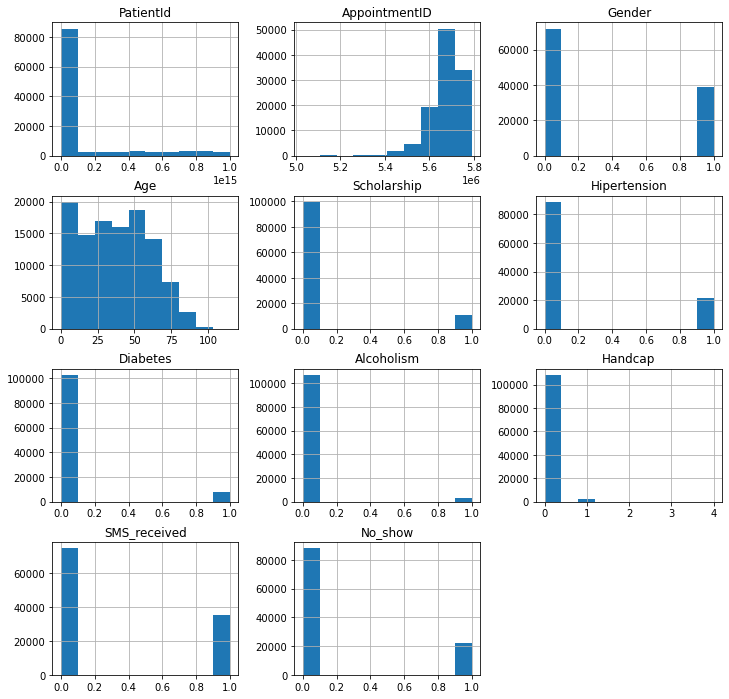

In [91]:
df.hist(figsize=(12,12))

In [92]:
df.corr()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
PatientId,1.000000,0.004023,0.007898,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456
AppointmentID,0.004023,1.000000,0.018506,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597
Gender,0.007898,0.018506,1.000000,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,-0.004122
Age,-0.004121,-0.019106,-0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.002877,0.022619,-0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hipertension,-0.006436,0.012759,-0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.001608,0.022632,-0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.011014,0.032946,0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handcap,-0.007915,0.014107,0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,-0.009742,-0.256613,-0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428


Text(0.5, 1.0, 'Heatmap of the Data corrolation')

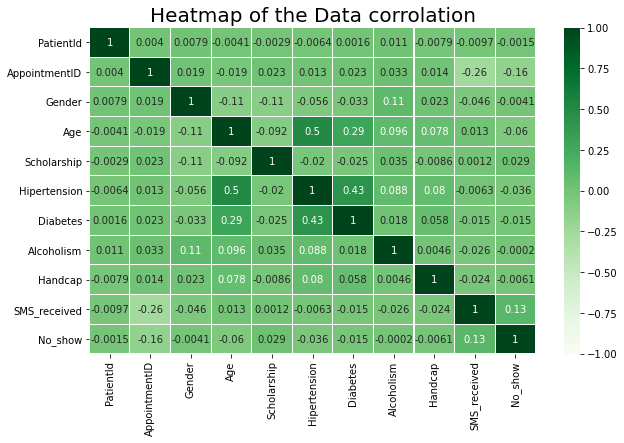

In [93]:
# Visualize correlation matrix
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "Greens", linewidths=0.05, annot=True)
plt.title('Heatmap of the Data corrolation', fontsize = 20)

#### There is a strong positive correlation between Hipertension and Age and between Hipertension and Diabetic.



In [94]:
male_diab_impact = pd.pivot_table(data = df, index = ["Neighbourhood"], values = "No_show")
round(male_diab_impact * 100, 2) 

,No_show
Neighbourhood,
AEROPORTO,12.50
ANDORINHAS,23.03
ANTÔNIO HONÓRIO,18.45
ARIOVALDO FAVALESSA,21.99
BARRO VERMELHO,21.51
...,...
SÃO JOSÉ,21.65
SÃO PEDRO,21.04
TABUAZEIRO,18.30


In [95]:
#create pivot tables to show the impact of features on each other
def relationship(indexlist):
    impact = pd.pivot_table(data = df, index = indexlist, values = "No_show")
    return round(impact * 100, 2)

#### Q1:What is the effect of Scholership on show up?

In [96]:
# The relationship between Show and scholaship
relationship("Scholarship")

,No_show
Scholarship,
0,19.81
1,23.74


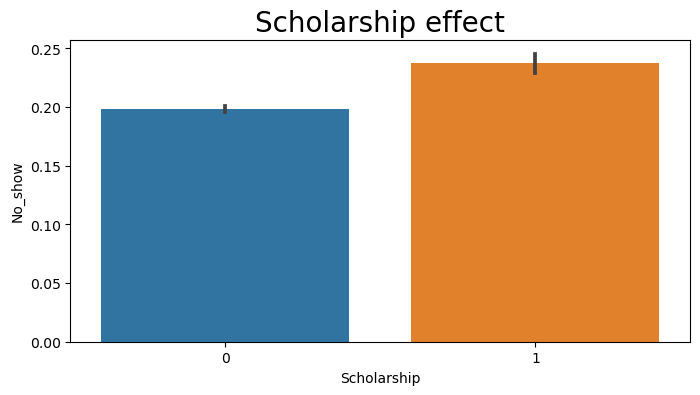

In [97]:
#graph the result
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x=df.Scholarship, y=df.No_show)
plt.title('Scholarship effect', fontsize = 20)
plt.show()

####  It seems that Scholarship has a negative effect on show up

In [98]:
#Scholar Age Impact
relationship(["Scholarship", "AgeCategories"])

No_show
Scholarship AgeCategories         
0           0 - 14           19.30
            15 - 29          24.86
            30 - 44          23.90
            45 - 59          20.91
            60 - 74          18.79
            75 - 89          16.13
            90 - 115         15.39
1           0 - 14           20.13
            15 - 29          27.77
            30 - 44          26.12
            45 - 59          24.07
            60 - 74          21.59
            75 - 89          20.95
            90 - 115         13.43

In [99]:
#Scholar Gender Impact
relationship(["Scholarship", "Gender"])

No_show
Scholarship Gender         
0           0         19.83
            1         19.77
1           0         23.79
            1         23.51

In [100]:
#Scholar Hipertension Impact
relationship(["Scholarship", "Hipertension"])

No_show
Scholarship Hipertension         
0           0               20.49
            1               17.07
1           0               24.57
            1               19.75

In [101]:
#Scholar Diabetes Impact
relationship(["Scholarship", "Diabetes"])

No_show
Scholarship Diabetes         
0           0           19.97
            1           17.72
1           0           23.85
            1           21.62

In [102]:
#Scholar Alcoholism Impact
relationship(["Scholarship", "Alcoholism"])

No_show
Scholarship Alcoholism         
0           0             19.84
            1             18.64
1           0             23.51
            1             28.22

#### Q2:What is the effect of SMS received on show up?

In [103]:
# The relationship between Show and scholaship
relationship("SMS_received")

,No_show
SMS_received,
0,16.70
1,27.57


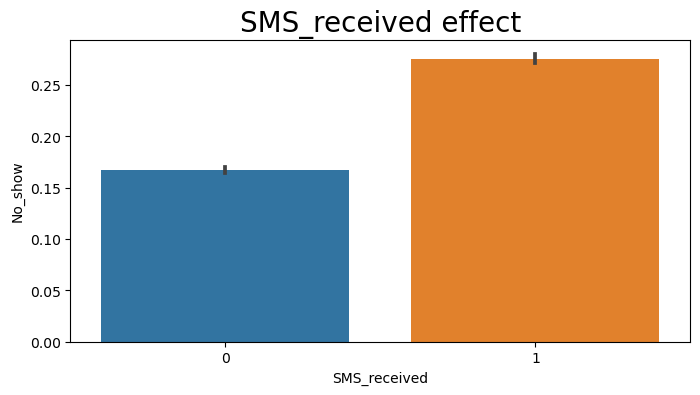

In [104]:
#graph the result
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x=df.SMS_received, y=df.No_show)
plt.title('SMS_received effect', fontsize = 20)
plt.show()

####  It seems that SMS received has a negative effect on show up

In [105]:
#SMS_received Age Impact
relationship(["SMS_received", "AgeCategories"])

No_show
SMS_received AgeCategories         
0            0 - 14           15.68
             15 - 29          21.47
             30 - 44          18.83
             45 - 59          16.93
             60 - 74          16.10
             75 - 89          14.28
             90 - 115         13.52
1            0 - 14           28.73
             15 - 29          33.57
             30 - 44          34.27
             45 - 59          30.41
             60 - 74          25.07
             75 - 89          20.56
             90 - 115         19.48

In [106]:
#SMS_received Gender Impact
relationship(["SMS_received", "Gender"])

No_show
SMS_received Gender         
0            0         16.53
             1         17.01
1            0         27.77
             1         27.16

In [107]:
#SMS_received Hipertension Impact
relationship(["SMS_received", "Hipertension"])

No_show
SMS_received Hipertension         
0            0               17.15
             1               14.92
1            0               28.80
             1               22.49

In [108]:
#SMS_received Diabetes Impact
relationship(["SMS_received", "Diabetes"])

No_show
SMS_received Diabetes         
0            0           16.77
             1           15.86
1            0           27.89
             1           23.09

In [109]:
#SMS_received Alcoholism Impact
relationship(["SMS_received", "Alcoholism"])

No_show
SMS_received Alcoholism         
0            0             16.73
             1             15.92
1            0             27.45
             1             32.70

#### Conclusions

#### It has been noticed that the welfare programe and sms received has a negative effect on the show up 

#### But also there is an issue in the dataset that there are 81 Neighbourhoods making it is very hard to get insights over all this Neighbourhoods. It would be great to study specific Neighbourhood.

In [110]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1